In [2]:
from diagrams import Cluster, Diagram, Edge
from diagrams.custom import Custom
from diagrams.aws.storage import S3
from diagrams.aws.database import RDS
from diagrams.programming.language import Python

graph_attr = {
    "splines": "spline"
}


with Diagram("Flow Diagram", filename="flow_diagram", show=False, direction="LR", graph_attr=graph_attr) as diag:
    user = Custom("User", "./input_icons/user.png")
    streamlit = Custom("UI", "./input_icons/streamlit.png")
    python = Python("Python")
    open_ai = Custom("Open AI", "./input_icons/openai.png")
    huggingface = Custom("Huggingface\n GAIA DATASET", "./input_icons/gaia_dataset.png")
    
   
    with Cluster("Data Storage"):
        s3 = S3("Unstructured Files")
        rds = RDS("Metadata Table")

    user >> Edge(label="Select the question and inputs") >> streamlit
    huggingface >> Edge(label="download GAIA dataset") >> python
    python >> Edge(label="Store metadata table") >> rds
    rds >> Edge(label="Retrieve questions") >> streamlit >> Edge(label="Updates Model responses") >> rds
    python >> Edge(label="Downloads and Uploads files") >> s3
    s3 >> Edge(label="Retrieve relevant files") >> streamlit
    streamlit >> Edge(label="Send Questions and Steps") >> open_ai >> Edge(label="Returns LLM responses") >> streamlit


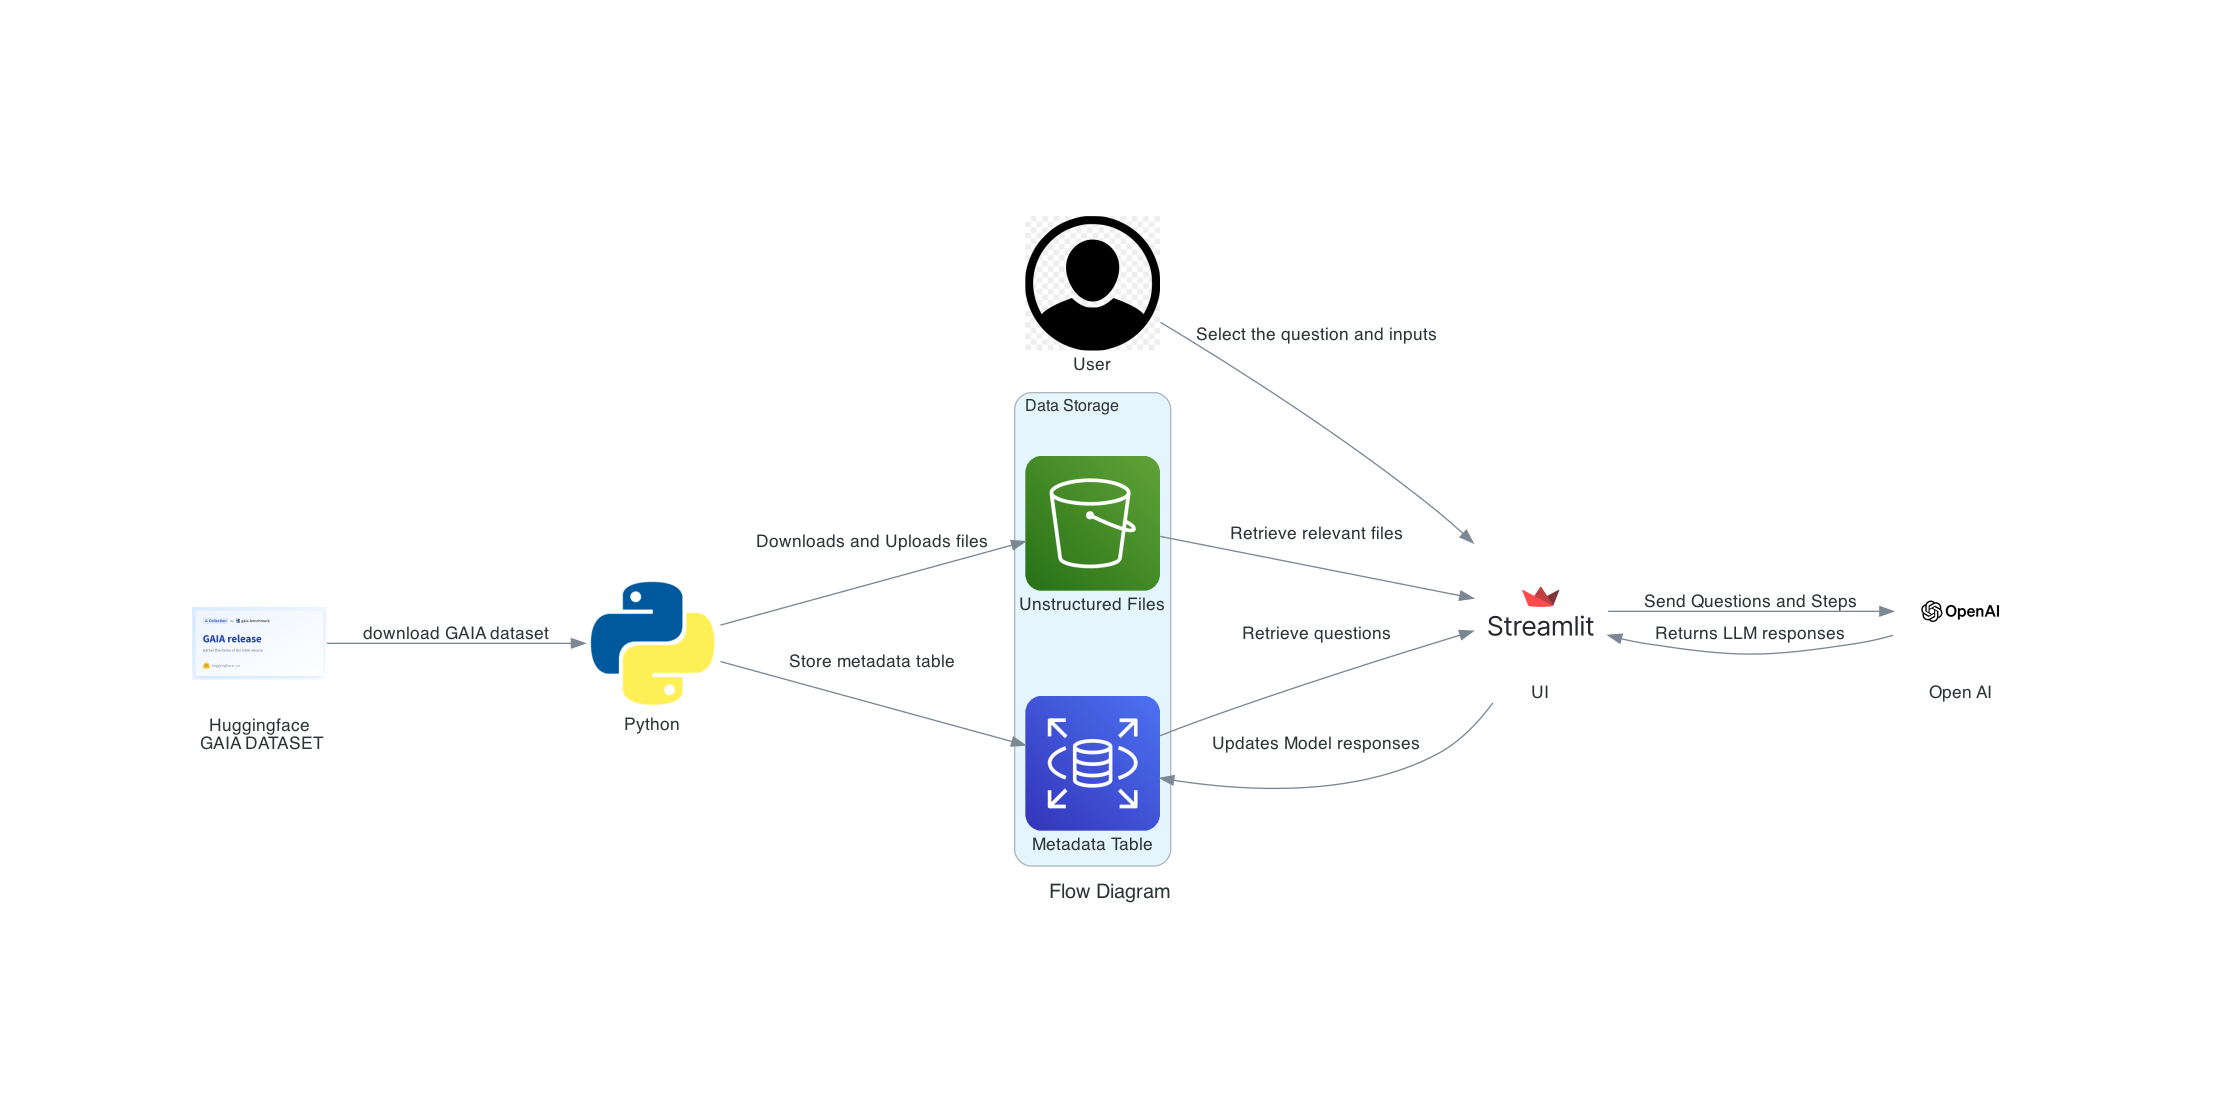

In [3]:
diag